In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from matplotlib.gridspec import GridSpec

In [42]:
df = pd.read_csv('hcvdat0.csv')

In [43]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [44]:
df = df.drop(columns=['Unnamed: 0'])

In [45]:
def convert_category(category):
    if category == '0=Blood Donor':
        return 0
    else:
        return 1

df['Category'] = df['Category'].apply(convert_category)

In [46]:
# Change 'm' to 'Male' and 'f' to 'Female' in the Sex column
df['Sex'] = df['Sex'].map({'m': 'Male', 'f': 'Female'})

In [47]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,Male,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,Male,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,Male,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,Male,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,Male,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [48]:
df.shape

(615, 13)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 62.6+ KB


In [50]:
# Display the number of missing values for each column
missing_values = df.isnull().sum()
print(missing_values)

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


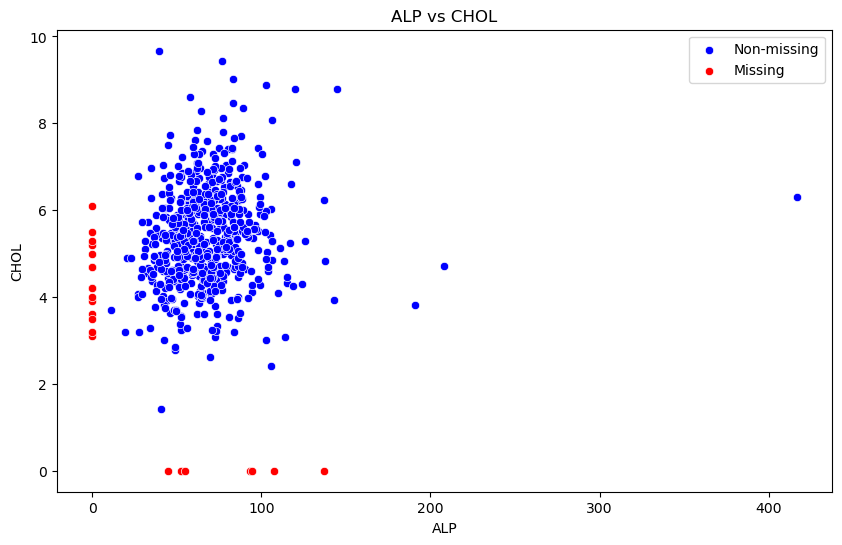

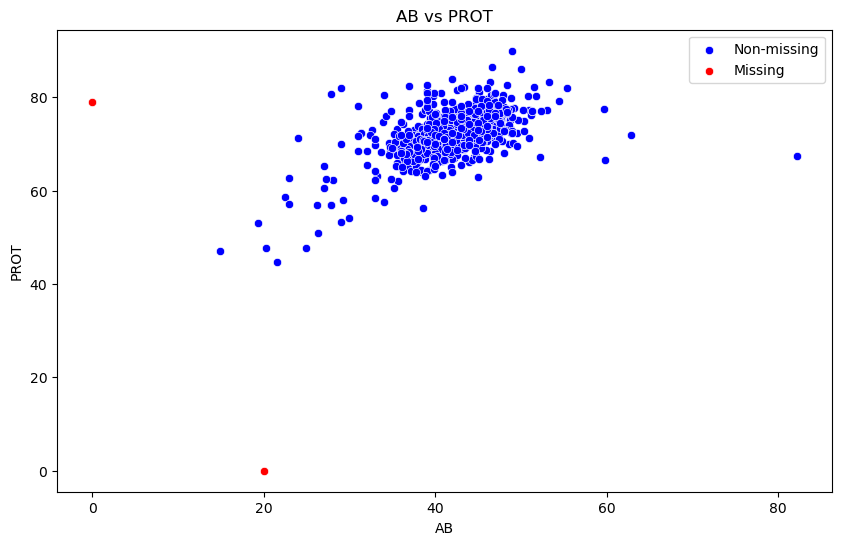

In [51]:
# Scatter plot for missing values

def scatter_plot_with_missing(data, x, y, xlabel, ylabel):
    plt.figure(figsize=(10, 6))

    non_missing_data = data.dropna(subset=[x, y])
    sns.scatterplot(x=non_missing_data[x], y=non_missing_data[y], color='blue', label='Non-missing')

    missing_data_x = data[data[x].isna()]
    sns.scatterplot(x=[0]*len(missing_data_x), y=missing_data_x[y], color='red', label='Missing')

    missing_data_y = data[data[y].isna()]
    sns.scatterplot(x=missing_data_y[x], y=[0]*len(missing_data_y), color='red')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{xlabel} vs {ylabel}')
    plt.legend()
    plt.show()

scatter_plot_with_missing(df, 'ALP', 'CHOL', 'ALP', 'CHOL')
scatter_plot_with_missing(df, 'ALB', 'PROT', 'AB', 'PROT')

In [52]:
#Columns with missing values 
columns_with_missing_values = ['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']

# Initialize the IterativeImputer 
imputer = IterativeImputer(max_iter=10, random_state=0)

# Perform imputation
df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])

# Check for any remaining missing values
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation)

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [53]:
df['Disease'] = df['Category']

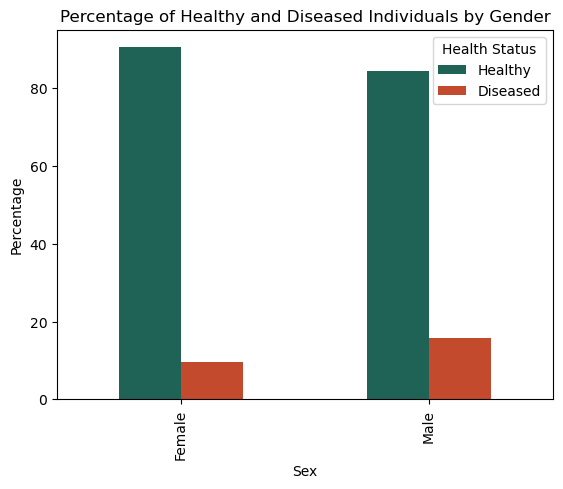

In [54]:
gender_disease_counts = df.groupby(['Sex', 'Disease']).size().unstack(fill_value=0)
gender_disease_percent = gender_disease_counts.div(gender_disease_counts.sum(axis=1), axis=0) * 100

gender_disease_percent = gender_disease_percent.reset_index()
gender_disease_percent.columns = ['Sex', 'Healthy', 'Diseased']

# Plot 
gender_disease_percent.plot(x='Sex', kind='bar', stacked=False, color=['#1F6357', '#C34A2C'])
plt.title('Percentage of Healthy and Diseased Individuals by Gender')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.legend(['Healthy', 'Diseased'], title='Health Status')
plt.show()

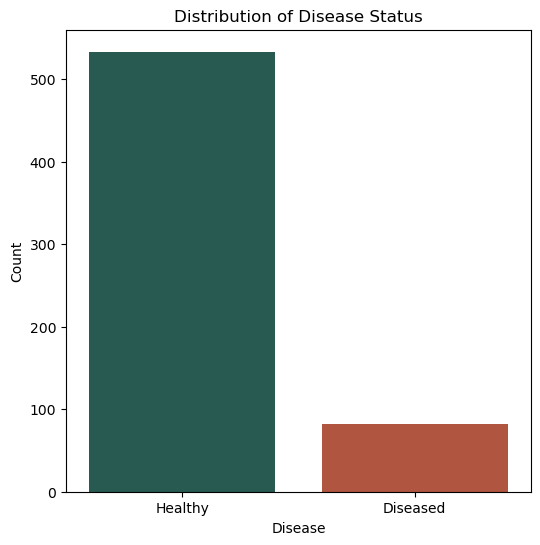

In [55]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Disease', data=df, palette=['#1F6357', '#C34A2C'])
plt.title('Distribution of Disease Status')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Healthy', 'Diseased'])
plt.show()

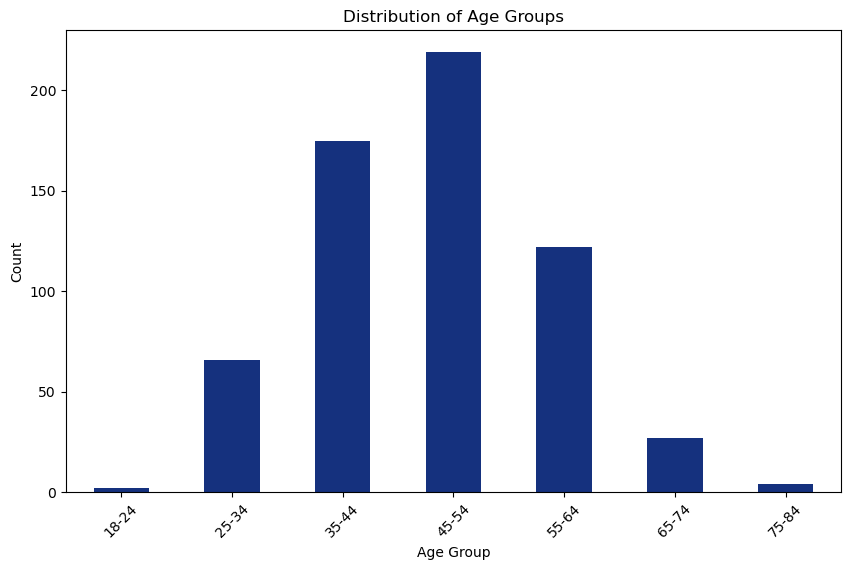

In [56]:
# Create age bins 
bins = [18 ,25, 35, 45, 55, 65, 75, 85]
labels = ['18-24','25-34', '35-44', '45-54', '55-64', '65-74', '75-84']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the number of occurrences in each age group
age_group_counts = df['Age Group'].value_counts(sort=False)

# Plot the distribution of age groups
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='#15317E')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

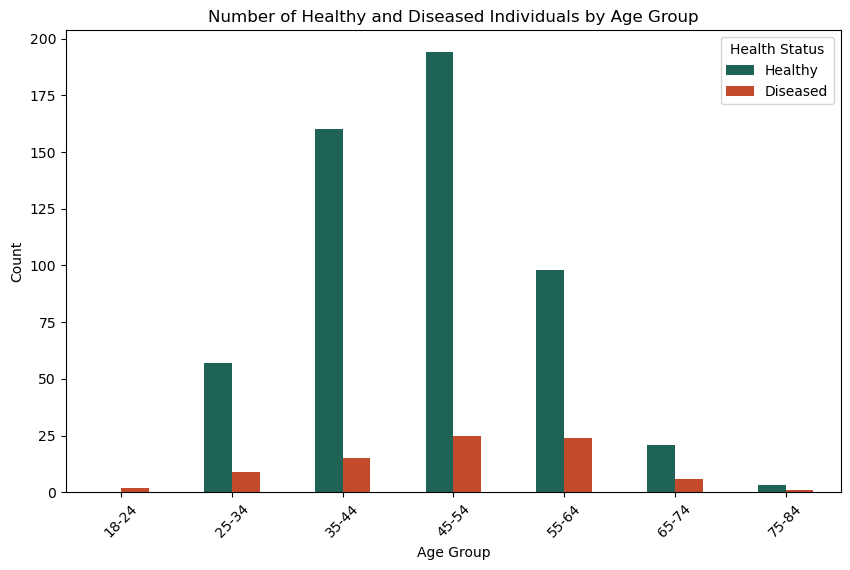

In [57]:
# Plot the grouped bar chart
age_group_disease_counts.plot(x='Age Group', kind='bar', stacked=False, color=['#1F6357', '#C34A2C'], figsize=(10, 6))
plt.title('Number of Healthy and Diseased Individuals by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['Healthy', 'Diseased'], title='Health Status')
plt.xticks(rotation=45)
plt.show()


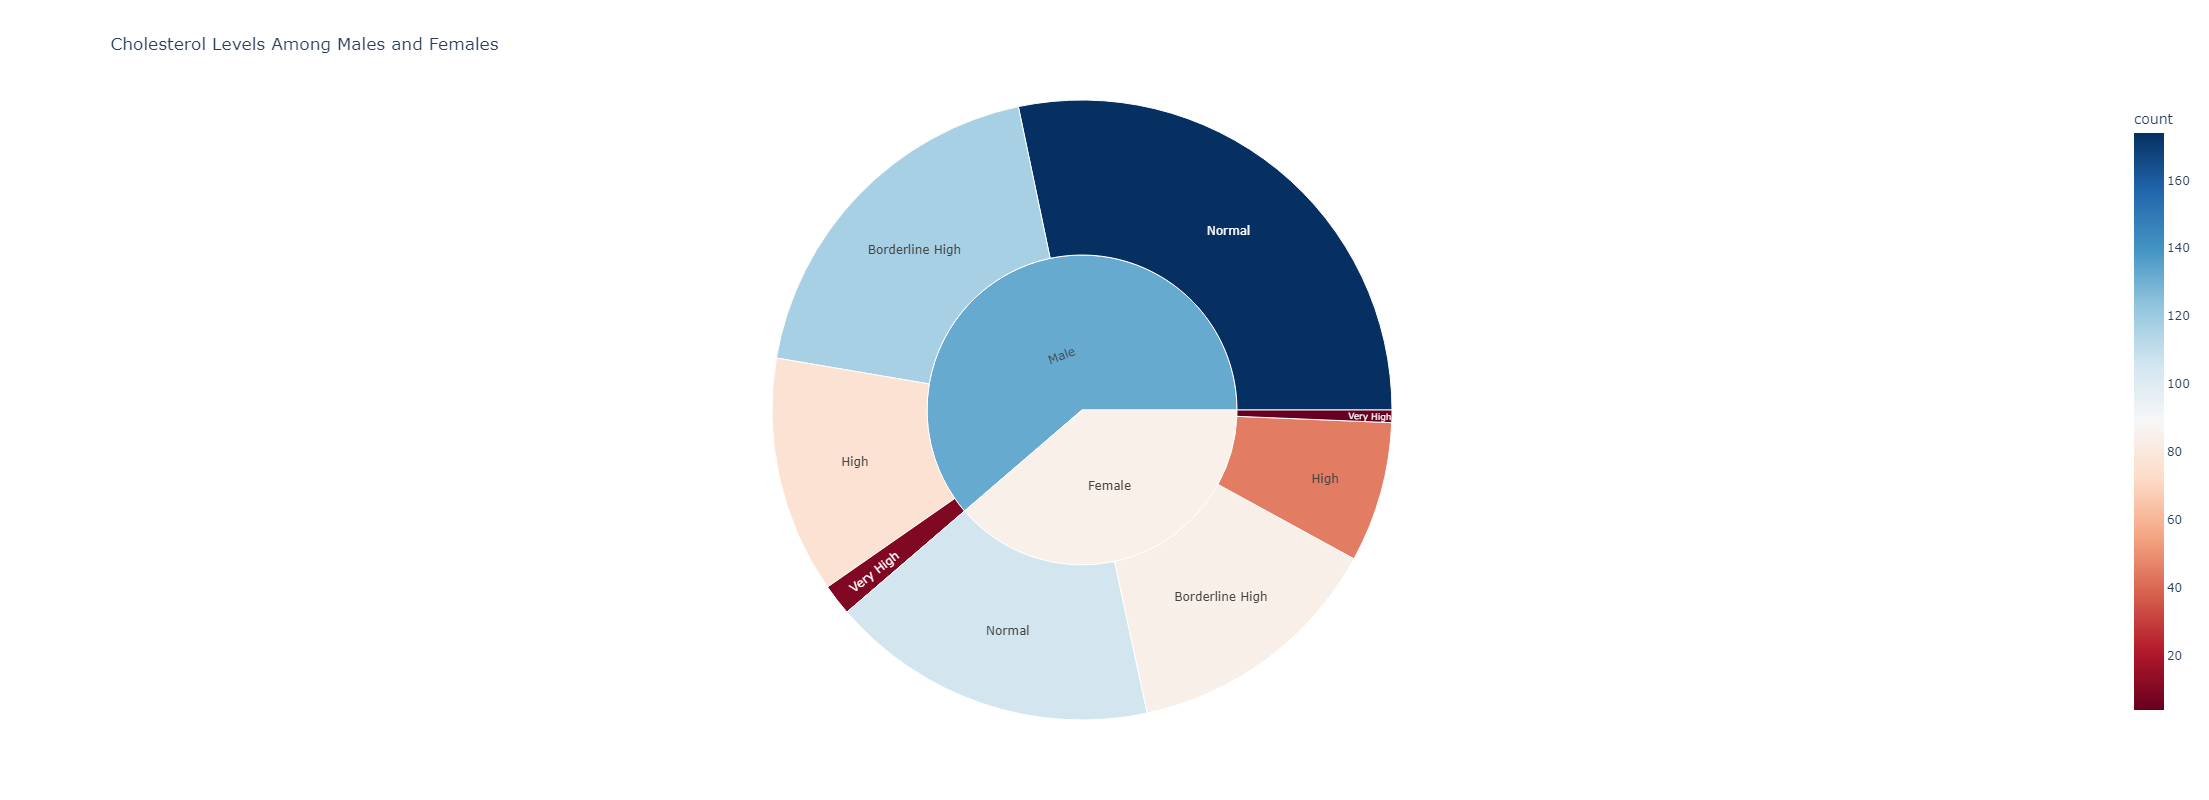

In [58]:
import plotly.express as px
# Create a function to categorize cholesterol levels
def categorize_chol(chol):
    if chol < 5.2:
        return 'Normal'
    elif 5.2 <= chol < 6.2:
        return 'Borderline High'
    elif 6.2 <= chol < 7.8:
        return 'High'
    else:
        return 'Very High'

df['Cholesterol Category'] = df['CHOL'].apply(categorize_chol)
chol_sex_counts = df.value_counts(['Sex', 'Cholesterol Category']).reset_index().rename(columns={0: "count"})


# Plot 
fig = px.sunburst(
    chol_sex_counts,
    path=['Sex', 'Cholesterol Category'],  
    values='count', 
    color='count',  
    color_continuous_scale='RdBu',  
    title='Cholesterol Levels Among Males and Females'
)
fig.update_layout(width=1200, height=800)
fig.show()

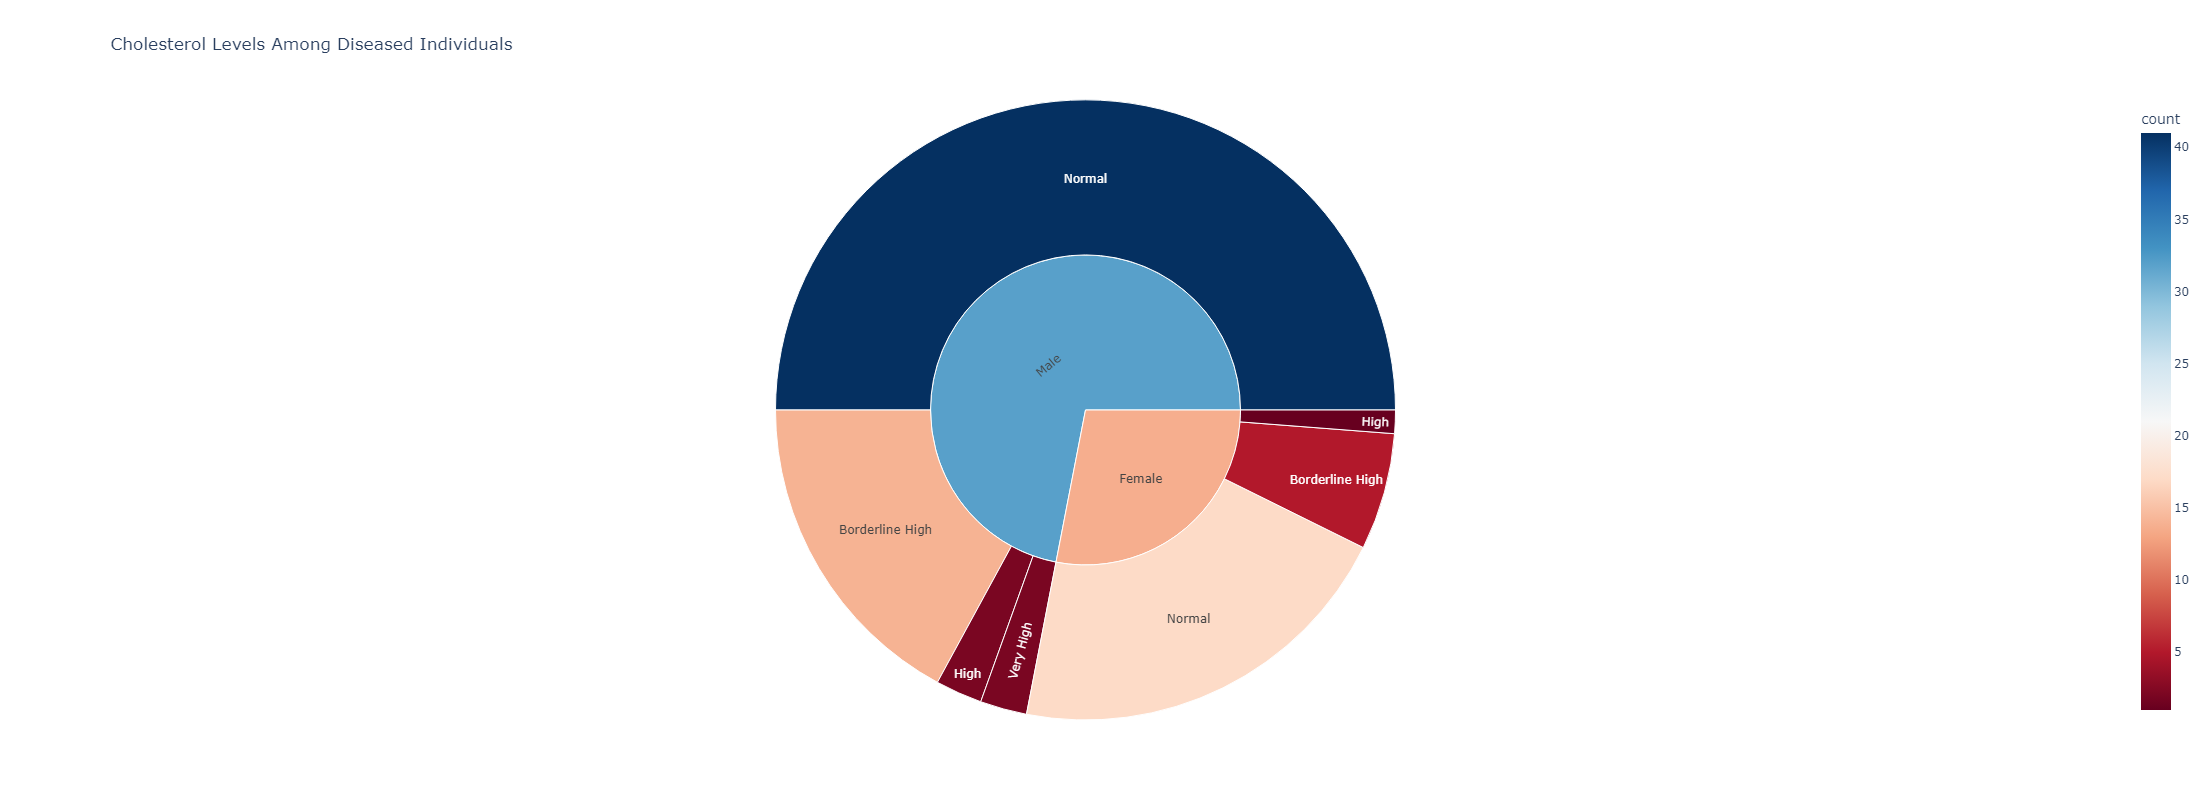

In [59]:
df_diseased = df[df['Category'] == 1].copy()

def categorize_chol(chol):
    if pd.isna(chol):
        return 'Unknown'
    elif chol < 5.2:
        return 'Normal'
    elif 5.2 <= chol < 6.2:
        return 'Borderline High'
    elif 6.2 <= chol < 7.8:
        return 'High'
    else:
        return 'Very High'

df_diseased['Cholesterol Category'] = df_diseased['CHOL'].apply(categorize_chol)
chol_sex_counts_diseased = df_diseased.value_counts(['Sex', 'Cholesterol Category']).reset_index().rename(columns={0: "count"})

# Plot 
fig = px.sunburst(
    chol_sex_counts_diseased,
    path=['Sex', 'Cholesterol Category'],  
    values='count', 
    color='count',  
    color_continuous_scale='RdBu',  
    title='Cholesterol Levels Among Diseased Individuals'
)
fig.update_layout(width=1200, height=800)
fig.show()

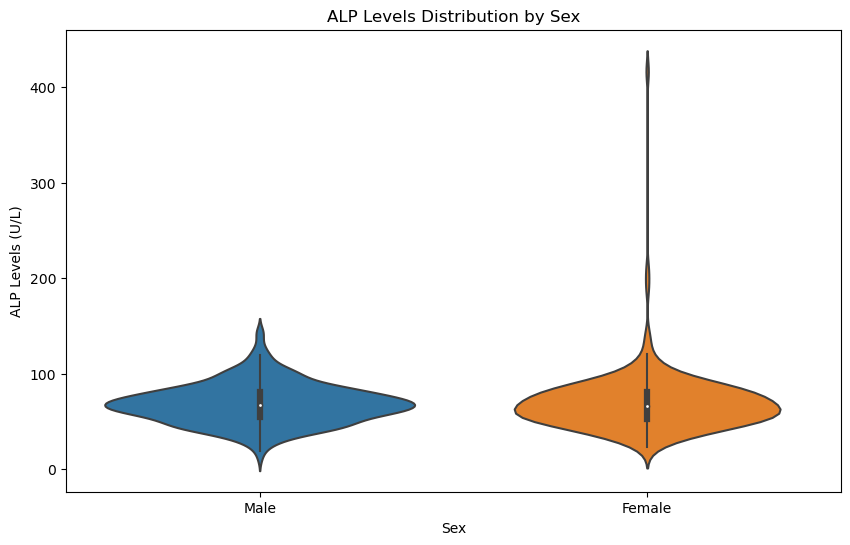

In [60]:
# Violin plot of ALP levels by Sex
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='ALP', data=df)
plt.title('ALP Levels Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('ALP Levels (U/L)')
plt.show()

<Figure size 1600x800 with 0 Axes>

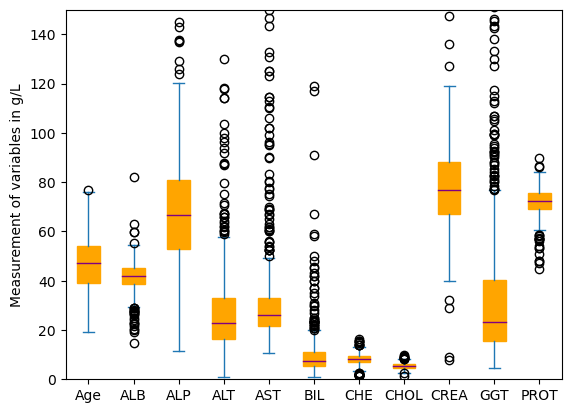

In [61]:
columns_to_plot = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

plt.figure(figsize=(16, 8))
boxprops = dict(facecolor='orange', color='orange')
medianprops = dict(color='purple')

df[columns_to_plot].plot(kind='box', vert=True, showfliers=True, 
                         patch_artist=True, boxprops=boxprops, medianprops=medianprops)
plt.ylim(0, 150)

plt.ylabel('Measurement of variables in g/L')

plt.xticks(rotation=0)
plt.show()

In [62]:
continuous_vars = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

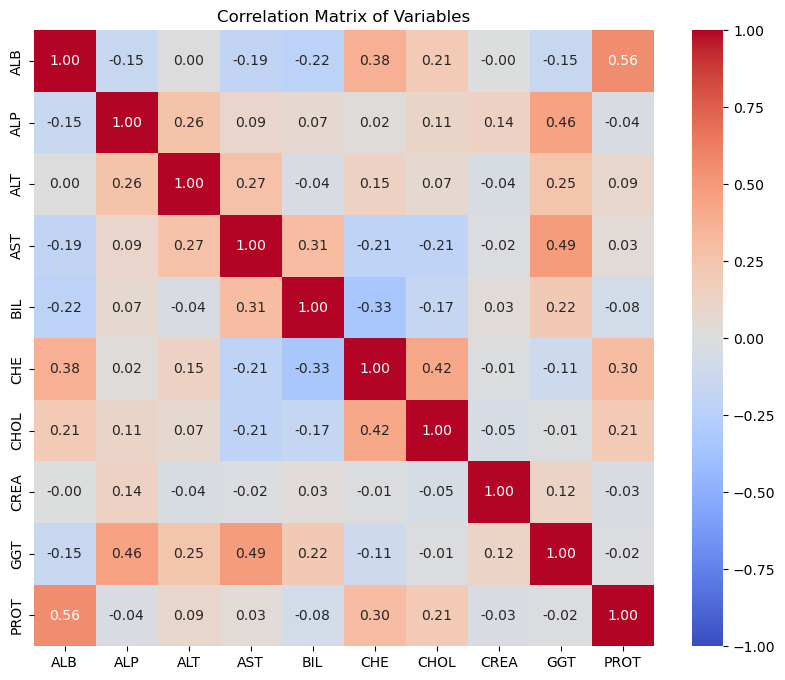

In [63]:
# Compute the correlation matrix
corr = df[continuous_vars].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Variables')
plt.show()